In [7]:
import json
import re
from loguru import logger


def parse_log_file(log_file_path, pattern='sorted apys'):
    parsed_data = []
    # json_pattern = re.compile(r'sorted apys: ({.*})')
    json_pattern = re.compile(rf'{re.escape(pattern)}\s*({{.*}})')
    # json_pattern = re.compile(rf'{re.escape(pattern)}({{.*}})')

    def convert_to_valid_json(json_str):
        # Replace unquoted keys with quoted keys
        json_str = re.sub(r'(\d+):', r'"\1":', json_str)
        return json_str

    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            match = json_pattern.search(line)
            if match:
                json_str = match.group(1).strip()
                json_str = convert_to_valid_json(json_str)
                try:
                    json_data = json.loads(json_str)
                    parsed_data.append(json_data)
                except json.JSONDecodeError as e:
                    logger.error(f"Error parsing JSON: {e}")

    return parsed_data

# Example usage
log_file_path = '/Users/chau.hoang/Downloads/pious_snow.log'
# parsed_json_list = parse_log_file(log_file_path, pattern='sorted axon times: ')
parsed_json_list = parse_log_file(log_file_path, pattern='sorted apys: ')

In [8]:
import pandas as pd

uid = '228'
df = pd.DataFrame(parsed_json_list)
row = df.iloc[-9]
print(row[uid])
row[row < row[uid]].groupby(row).count().sort_values(ascending=False)



15.508869828400883


/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_59097/2006655545.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[row < row[uid]].groupby(row).count().sort_values(ascending=False)


270
1.545849e+01     65
2.225074e-308    13
1.354485e+01      1
1.543061e+01      1
1.550887e+01      1
Name: 270, dtype: int64

279
19.102536838206106
2024-06-10 19:48:50.271 |       INFO       | You are connecting to finney network with endpoint wss://entrypoint-finney.opentensor.ai:443.
2024-06-10 19:48:50.272 |     WARNING      | We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network.
2024-06-10 19:48:50.272 |     WARNING      | In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it.
2024-06-10 19:48:51.906 |       INFO       | Connected to finney network and wss://entrypoint-finney.opentensor.ai:443.


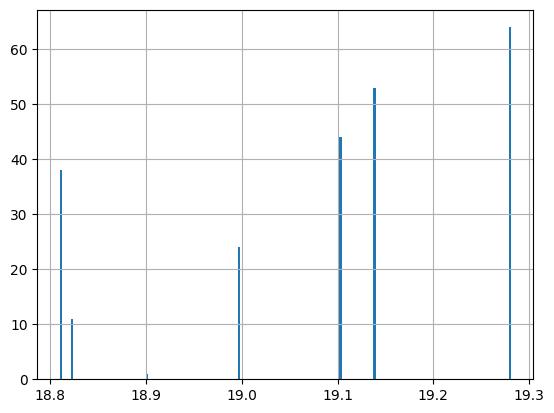

In [9]:
import pandas as pd
print(len(parsed_json_list))
# better = [p for p in parsed_json_list if p['156'] < p['83']]

# print(len(better) / len(parsed_json_list))

# small = [p for p in parsed_json_list if p['83'] < 1]

# len(small)

uid = '228'

# df.iloc[-1]
# df['time'].hist(bins=100)
# print(f'Uid: {uid} Mean time: {df["time"].mean()}')

df = pd.DataFrame(parsed_json_list)
row = df.iloc[-2]
print(row[uid])
row[row > 18].hist(bins=200)


import bittensor as bt
subtensor = bt.subtensor(network='finney')
metagraph = subtensor.metagraph(netuid=10)



In [10]:
uid = '228'
ids = row[row == row[uid]].index
coldkey = {}
for id in ids:
    id = int(id)
    if metagraph.axons[id].coldkey not in coldkey:
        coldkey[metagraph.axons[id].coldkey] = [metagraph.axons[id].hotkey]
    else:
        coldkey[metagraph.axons[id].coldkey].append(metagraph.axons[id].hotkey)

for k, v in coldkey.items():
    print(f'coldkey: {k}')
    for key in v:
        print(f'   {key}')


coldkey: 5Gq6QXY3GET1BYbTxZmUwgTkFNc7vnRXtkKdxNEhsgDuYwbL
   5DycATA3gvJ7REPMQs7QYiVXnw5kMHUwjmhYhezsC3wygL8G
   5CyvHzPH3J6EK7SQNB3nVCenm4xSZsyiqEWCpqywrXnbg6XY
   5ETvgB2UjsyCa6mXy3GzJdWYzcmmPA7FhXJkwgg3uNF7VMLv
   5EaDaFTS2cgquj1m9Nch2vVxc3m5mWseMDznkjjQ5ueGwaSh
   5HEKWoYnrAr9PqfM7gfDDA3pnaR6BLyXPjVvAwcTFdHs4wRQ
coldkey: 5FpeqhJ3hiJ5f4w4f82p1rptbB8kijekMJDsdgKW28hPa7gZ
   5G11X6J48XPAjX6CGcquULPumwHVmetPD4rVpASyDzWhGU6z
   5EervvT6FidnzvDHKX9oSBAWN1rppwkXPNMWjEicqrNnucw8
   5FvUK9C6Bbvmdvyro3UkJSdV1E6VhCpFPbKBjf2Vbx1owJfT
   5CMD5mR4DpHSnf6hM1WnWSGHPHoc9fZ9egWF3um9hbiZyuv4
   5GgtjD4RNDjrPMx9yc8BCA4z5EAYkSMRte78FJU5gQvWMARn
   5GVzEVcu3G1FEsgBi8VBNfsVwCMGXx741hZLJwaarngTQD2H
   5HVWT3iicJ8xGxJWdne7uKQ7BEzLecDsdQbt7Z3roB2ACsuE
   5CXdgNfShiuB7L9rcvvHYyUFXEzadQyMEbkJQRRfZLb2MCXb
   5GbVDTfGgFeJb1PdQAFGZpBrV3tMWVkYA1SDH92xWacb3DsQ
   5FFVQBfd1y1cjWJwdd38gNbicyKoucmhsbMfMXMswzJWyXyD
   5Hj6KJhdRLbC3C8tuxJQzEJ1FBV1pn59YRcXVjLH2ZdAuJTy
   5CJpX8R1YgULi2qym2ss2fWJ2owZUwLg3zF67TxeY5ni95hP


In [11]:
# Sorting apy and average score according to the log
df = pd.DataFrame(parsed_json_list)
df['max_apy'] = df.max(axis=1)
columns_to_scale = ['161', '156', '203', '255', '101', '1', '100', '10']
# Calculate the ratio
ratio_df = df[columns_to_scale].div(df['max_apy'], axis=0)
ratio_df.mean()

161    0.977560
156    0.977560
203    0.977560
255    0.977560
101    0.978851
1      0.939425
100    0.981928
10     0.946424
dtype: float64

In [12]:
# Sorting apy and average score according to the log
df = pd.DataFrame(parsed_json_list)
df['max_apy'] = df.max(axis=1)
columns_to_scale = ['161', '156', '203', '255', '101', '1', '100', '10']
# Calculate the ratio
ratio_df = df[columns_to_scale].div(df['max_apy'], axis=0)
ratio_df.mean()

161    0.977560
156    0.977560
203    0.977560
255    0.977560
101    0.978851
1      0.939425
100    0.981928
10     0.946424
dtype: float64

21.25532759918037
153     2.140792e+01
49      2.140792e+01
138     2.140792e+01
131     2.140792e+01
128     2.140792e+01
           ...      
50     2.225074e-308
43     2.225074e-308
40     2.225074e-308
20     2.225074e-308
251    2.225074e-308
Name: 263, Length: 250, dtype: float64


<Axes: >

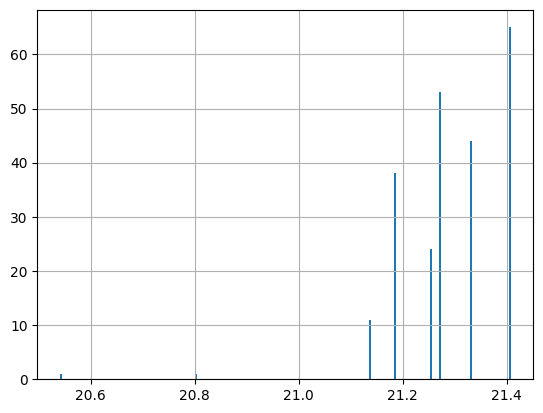

In [13]:

df = pd.DataFrame(parsed_json_list)
print(df.iloc[263]['244'])
ss = df.iloc[263]
print(ss.sort_values(ascending=False))
ss.sort_values()[ss > 15].hist(bins=200)
# df.iloc[263].sort_values().hist(bins=200)

In [14]:
import json

def convert_to_valid_json(json_str):
    # Replace unquoted keys with quoted keys
    json_str = re.sub(r'(\d+):', r"'\1':", json_str)
    return json_str


In [15]:
import re, json

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

alloc = data['answers']
print(alloc['136'])
print(alloc['212'])
print(alloc['169'])
print(alloc['201'])

{'apy': 20.61983099229947, 'allocations': {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}}
{'apy': 20.61983099229947, 'allocations': {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}}
{'apy': 19.91857056197781, 'allocations': {'0': 0.0411, '1': 0.2705, '2': 0.2805, '3': 0.1969, '4': 0.3916, '5': 0.2522, '6': 0.0001, '7': 0.0614, '8': 0.3536, '9': 0.1515}}
{'apy': 19.91857056197781, 'allocations': {'0': 0.0411, '1': 0.2705, '2': 0.2805, '3': 0.1969, '4': 0.3916, '5': 0.2522, '6': 0.0001, '7': 0.0614, '8': 0.3536, '9': 0.1515}}


In [16]:
import pandas as pd
import numpy as np
from sturdy.score import get_agg_apy
from sturdy.utils.misc import supply_rate

def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

pools = data['pools']

print('136', calc_apy(pools, alloc['136']['allocations']))
print('169', calc_apy(pools, alloc['169']['allocations']))

scores = []
for i in range(1000):
    scores.append({
        '136': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
        '169': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations'])
    })
df = pd.DataFrame(scores)
df['win'] = df.idxmax(axis=1)
df['win'].value_counts()

136 0.10617200299035105
169 0.1138654327635179


win
136    1000
Name: count, dtype: int64

In [17]:
from sturdy.score import run_simulation
from sturdy.utils.misc import borrow_rate

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

pools = data['pools']

uid = '169'

simulators = {
    '136': run_simulation({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
    '169': run_simulation({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations']),
    'new': run_simulation({'total_assets': 2.0, 'pools': pools}, {pool_id: 0.1 for pool_id in pools.keys()})
}

# allocations = alloc['136']['allocations']
allocations = {pool_id: 0.1 for pool_id in pools.keys()}
rates = []
for i in range(10):
    rates.append(borrow_rate(allocations[str(i)], pools[str(i)]))
print('median', np.sum(np.abs(np.array(rates) - np.median(rates))))

median 0.08788401745313511


In [18]:
# pools
import copy

uid = 'new'
allocs = {pool_id: 0.1 for pool_id in pools.keys()}

borrow_amounts = [{
    pool_id: pool[pool_id]['borrow_amount']
        for pool_id in allocs.keys()
    }
    for pool in simulators[uid].pool_history
]

df = pd.DataFrame(borrow_amounts)
df.mean()
new_pools = copy.deepcopy(pools)
for pool in new_pools.values():
    pool['borrow_amount'] = df[pool['pool_id']].mean()

In [86]:
%load_ext autoreload
%autoreload 2
import json
from sturdy.protocol import AllocateAssets
from sturdy.utils.yiop import yiop_allocation_algorithm

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

pools = data['pools']

def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield


allocation = yiop_allocation_algorithm(AllocateAssets(assets_and_pools={'total_assets': 2.0, 'pools': new_pools}))
adjusted_allocation = {'0': 0.14331221256725712, '1': 0.24961938930487432, '2': 0.25577597643447086, '3': 0.18357903764354155, '4': 0.3334365311754749, '5': 0.24483514937520867, '6': 0.00012747125790562374, '7': 0.12537311167011267, '8': 0.32248716032642344, '9': 0.1414539602387308}

print('136', calc_apy(pools, alloc['136']['allocations']))
print('169', calc_apy(pools, alloc['169']['allocations']))
print('136', alloc['136']['allocations'])

scores = []
for i in range(1000):
    scores.append({
        '136': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
        '169': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations']),
        'adjusted': get_agg_apy({'total_assets': 2.0, 'pools': pools}, adjusted_allocation)
    })
df = pd.DataFrame(scores)
df['win'] = df.idxmax(axis=1)
df['win'].value_counts()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
136 0.10617200299035105
169 0.1138654327635179
136 {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}


win
136    1000
Name: count, dtype: int64

In [82]:
print(pools)
print(alloc['136']['allocations'])
print(alloc['169']['allocations'])

{'0': {'pool_id': '0', 'base_rate': 0.02, 'base_slope': 0.036, 'kink_slope': 0.388, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.02, 'base_slope': 0.09, 'kink_slope': 0.639, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '2': {'pool_id': '2', 'base_rate': 0.04, 'base_slope': 0.061, 'kink_slope': 0.765, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '3': {'pool_id': '3', 'base_rate': 0.02, 'base_slope': 0.059, 'kink_slope': 0.711, 'optimal_util_rate': 0.7, 'borrow_amount': 0.75, 'reserve_size': 1.0}, '4': {'pool_id': '4', 'base_rate': 0.03, 'base_slope': 0.093, 'kink_slope': 0.937, 'optimal_util_rate': 0.9, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '5': {'pool_id': '5', 'base_rate': 0.01, 'base_slope': 0.099, 'kink_slope': 0.297, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '6': {'pool_id': '6', 'base_rate': 0.02, 'base_slope': 0.039, 'kink_slope': 0

apy 17.766663923586105
apy 19.246837021639184
169 4.867579157146879
136 5.273106033325804


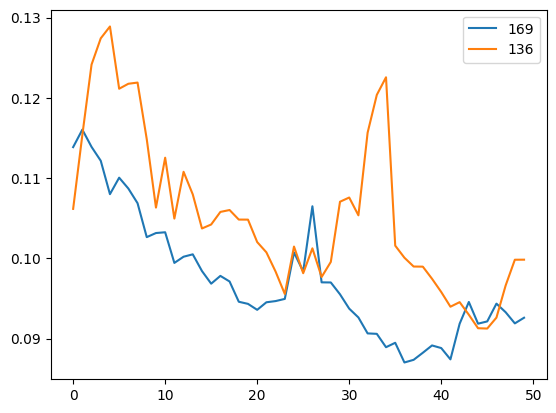

In [76]:



from sturdy.score import get_list_agg_apy

plot = {}
res = get_list_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations']),
print('apy', res[0][0])
plot = {'169': res[0][1]}
res = get_list_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
print('apy', res[0][0])
plot['136'] = res[0][1]

df = pd.DataFrame(plot)
df.plot()
for k, v in plot.items():
    print(f'{k} {sum(v)}')



In [ ]:
# What if we know pool_history in simulator ahead of time?



In [ ]:
parsed_json_list = parse_log_file(log_file_path, pattern='sorted apys: ')
df = pd.DataFrame(parsed_json_list)

df.iloc[-1][76] # 19.908930204134524
df.iloc[-1][228] # 19.412394419579094

len([i for i in df.iloc[-1] if i == df.iloc[-1][228]])

/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44111/2978696010.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[-1][76] # 19.908930204134524
/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44111/2978696010.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[-1][228] # 19.412394419579094
/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44111/2978696010.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

53